In [49]:
import numpy as np
import pandas as pd

path="Business_sales_EDA.csv"
zara_df = pd.read_csv(path,sep=";") 
zara_df

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20247,219627,Front of Store,Yes,clothing,No,1754,Zara,https://www.zara.com/us/en/suit-jacket-in-100-...,CROPPED WASHED T-SHIRT CHARCOAL,Running shoes. Upper in a combination of piece...,31.95,USD,jeans,WOMAN,Summer,Linen Blend,India
20248,219628,Aisle,No,clothing,No,872,Zara,https://www.zara.com/us/en/fleece-overshirt-p0...,SATIN WOVEN LEATHER SLIDES STONE,Slim fit shirt. Round neck and short sleeves.,49.99,USD,jackets,WOMAN,Spring,Linen,China
20249,219629,Aisle,Yes,clothing,No,1360,Zara,https://www.zara.com/us/en/faux-suede-patch-ja...,RELAXED CROPPED LEATHER JACKET CHARCOAL,Ankle boots. Made of leather with a suede fini...,20.99,USD,shoes,WOMAN,Spring,Polyester,China
20250,219630,Aisle,No,clothing,No,892,Zara,https://www.zara.com/us/en/fine-knit-crop-swea...,SLIM BASIC 100% WOOL SWEATER BURGUNDY,RETRO SNEAKERS,64.95,USD,jackets,WOMAN,Winter,Polyester,Spain


In [50]:
zara_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        20252 non-null  int64  
 1   Product Position  20252 non-null  object 
 2   Promotion         20252 non-null  object 
 3   Product Category  20252 non-null  object 
 4   Seasonal          20252 non-null  object 
 5   Sales Volume      20252 non-null  int64  
 6   brand             20252 non-null  object 
 7   url               20252 non-null  object 
 8   name              20251 non-null  object 
 9   description       20250 non-null  object 
 10  price             20252 non-null  float64
 11  currency          20252 non-null  object 
 12  terms             20252 non-null  object 
 13  section           20252 non-null  object 
 14  season            20252 non-null  object 
 15  material          20252 non-null  object 
 16  origin            20252 non-null  object

In [51]:
# Check for missing values
print("="*50)
missing_values = zara_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
print("="*50)

#check for duplicates
print("="*50)
duplicates = zara_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print("="*50)

#check for NaN values
nan_values = zara_df.isna().sum()
print("NaN values in each column:")
print(nan_values)

Missing values in each column:
Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                1
description         2
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64
Number of duplicate rows: 0
NaN values in each column:
Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                1
description         2
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64


The dataset contains 2 missing values in the description column and 1 missing value in the name column.

In [102]:
#Fill the columns of description and name with null values with "Unknown" 
zara_df['description'] = zara_df['description'].fillna('Unknown')
zara_df['name'] = zara_df['name'].fillna('Unknown')

# Check for missing values
print("="*50)
missing_values = zara_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
print("="*50)

#check for NaN values
nan_values = zara_df.isna().sum()
print("NaN values in each column:")
print(nan_values)

Missing values in each column:
Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
name                0
description         0
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
revenue             0
Revenue             0
dtype: int64
NaN values in each column:
Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
name                0
description         0
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
revenue             0
Revenue             0
dtype: int64


Given the very small number of missing values (3 records), they were replaced with the placeholder value "Unknown". This ensures dataset completeness without meaningfully affecting the analytical results.

Sales volume by product category (highest to lowest):
jackets: 12,348,143.00 units
sweaters: 3,598,743.00 units
t-shirts: 2,879,378.00 units
shoes: 2,676,982.00 units
jeans: 721,308.00 units
Total sales volume: 22,224,554.00 units
Correlation between sales volume and price: -0.34


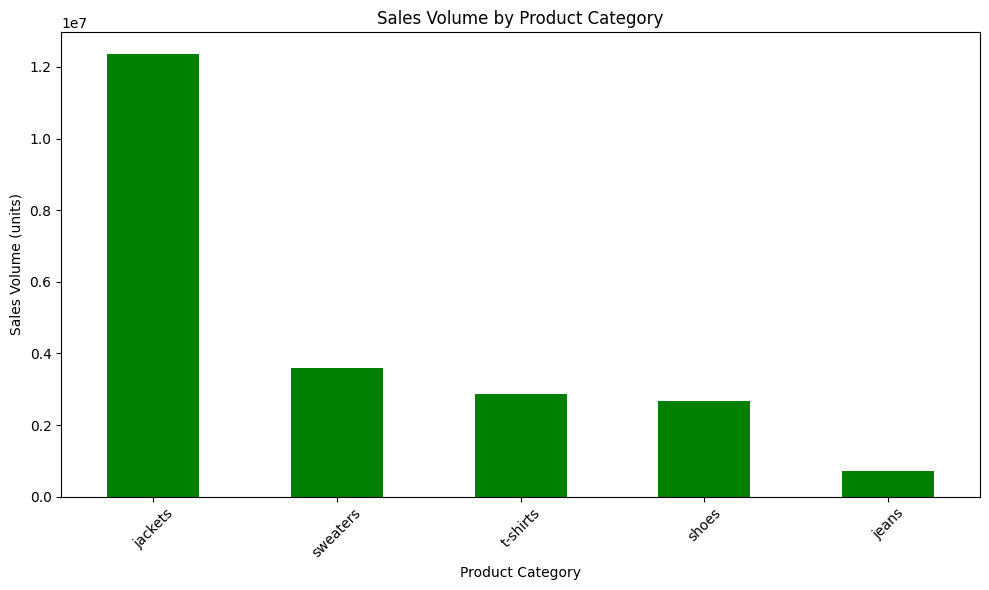

In [124]:
'''
Understanding the bussiness 
'''
import matplotlib.pyplot as plt

#Which product category has the highest sales volume and which has the lowest?
sales_by_category = zara_df.groupby('terms')['Sales Volume'].sum().sort_values(ascending=False)
print("Sales volume by product category (highest to lowest):")
for category, sales in sales_by_category.items():
    print(f"{category}: {sales:,.2f} units")

#volume of sales
total_sales = zara_df['Sales Volume'].sum()
print(f"Total sales volume: {total_sales:,.2f} units")

#Relationship between sales volume and price
print("="*50)
correlation = zara_df['Sales Volume'].corr(zara_df['price'])
print(f"Correlation between sales volume and price: {correlation:.2f}")

#Bar chart to visualize the sales volume distribution by product category
plt.figure(figsize=(10,6))
sales_by_category.plot(kind='bar', color='green')
plt.title('Sales Volume by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Volume (units)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this part of the analysis, we can highlight the following key findings:
    1)The store sold a total of 22,224,554 units.
    2)Jackets are the best-performing category, with 12,348,143 units sold, while jeans show the lowest sales volume at 721,308 units.
    3)The correlation between price and sales volume is -0.34, indicating a moderate negative relationship. In general, higher prices tend to be associated with lower sales volumes, although the effect is not particularly strong.

Correlation between sales volume and price for jackets: -0.33
Correlation between sales volume and price for shoes: -0.37
Correlation between sales volume and price for sweaters: -0.33
Correlation between sales volume and price for jeans: -0.35
Correlation between sales volume and price for t-shirts: -0.32
Average price by product category (highest to lowest):
terms
t-shirts    43.153500
jeans       42.917785
shoes       42.400997
sweaters    41.773018
jackets     41.560633
Name: price, dtype: float64


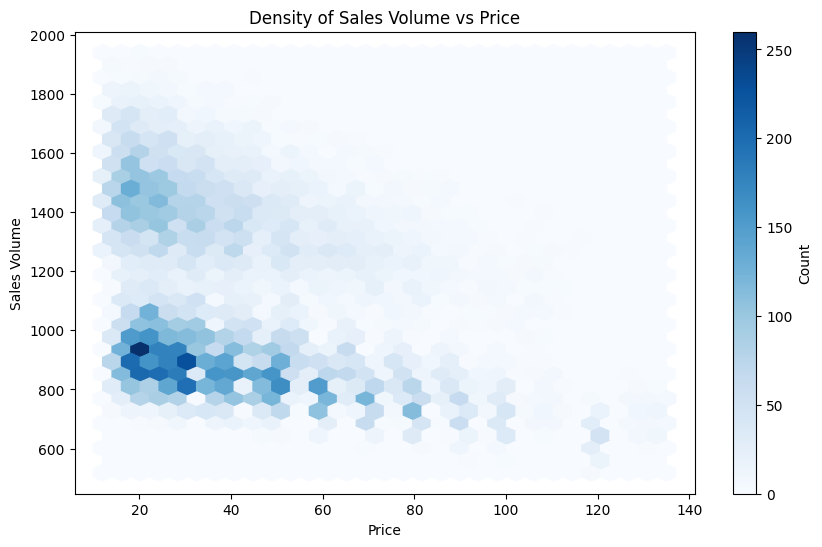

In [130]:
import seaborn as sns

#Find if all the terms follow the same tendency between sales volume and price
categories = zara_df['terms'].unique()
for category in categories:
    category_data = zara_df[zara_df['terms'] == category]
    category_correlation = category_data['Sales Volume'].corr(category_data['price'])
    print(f"Correlation between sales volume and price for {category}: {category_correlation:.2f}")
print("="*50)

#Find the price average for each product category
average_price_by_category = zara_df.groupby('terms')['price'].mean().sort_values(ascending=False)
print("Average price by product category (highest to lowest):")
print(average_price_by_category)

#Scatter plot to visualize the relationship between sales volume and price
plt.figure(figsize=(10,6))
plt.hexbin(zara_df['price'], zara_df['Sales Volume'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Price')
plt.ylabel('Sales Volume')
plt.title('Density of Sales Volume vs Price')
plt.show()

Across all product categories, sales volume tends to decrease as price increases, reflecting a moderate negative relationship. Shoes exhibit the strongest negative correlation among the categories; however, the difference is marginal. Additionally, the average prices across categories are very similar, suggesting that the pattern is consistent rather than driven by large price gaps between categories.

This trend is also supported by the density plot, where higher concentrations of observations appear in lower price ranges with higher sales volumes. As prices increase, the density gradually shifts downward, visually reinforcing the inverse relationship between price and demand.

Revenue by product category (highest to lowest):
jackets: $487,064,826.87
sweaters: $142,870,348.35
t-shirts: $118,223,033.20
shoes: $107,095,197.76
jeans: $29,347,753.84
price_bin
(11.877, 32.498]     1177.166173
(32.498, 52.997]     1086.743522
(52.997, 73.495]     1026.603294
(73.495, 93.993]      935.175518
(93.993, 114.492]     881.603883
(114.492, 134.99]     691.949416
Name: Sales Volume, dtype: float64


C:\Users\sanlo\AppData\Local\Temp\ipykernel_47412\4024171851.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_by_bin = zara_df.groupby('price_bin')['Sales Volume'].mean()


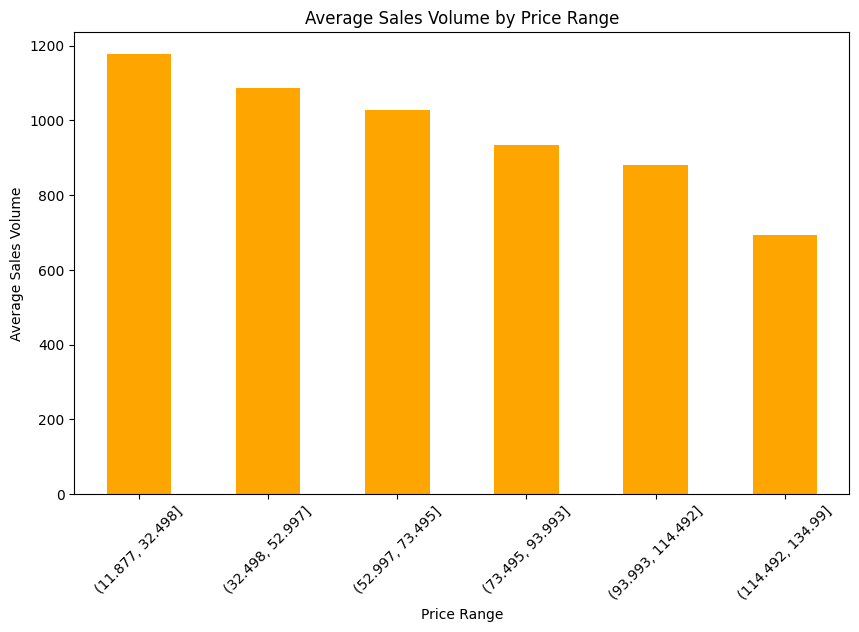

In [125]:
#Create revenue column
zara_df['Revenue'] = zara_df['Sales Volume'] * zara_df['price']

#Find the revenue for each product category
revenue_by_category = zara_df.groupby('terms')['Revenue'].sum().sort_values(ascending=False)
print("Revenue by product category (highest to lowest):")
for category, revenue in revenue_by_category.items():
    print(f"{category}: ${revenue:,.2f}")

print("="*50)

#Range of prices were sales volume is higher 
zara_df['price_bin'] = pd.cut(zara_df['price'], bins=6)
volume_by_bin = zara_df.groupby('price_bin')['Sales Volume'].mean()
print(volume_by_bin)

#Graph to visualiza were range of prices were sales volume is higher
plt.figure(figsize=(10,6))
volume_by_bin.plot(kind='bar',color='orange')
plt.title('Average Sales Volume by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Sales Volume')
plt.xticks(rotation=45)
plt.show()

Revenue and sales volume follow a very similar distribution, with jackets generating the highest income and jeans the lowest. This is consistent with the sales volume results, as jackets account for 12,348,143 units sold, while jeans represent only 721,308 units.

This indicates that jackets are the primary driver of the business in terms of both revenue and volume.

Additionally, the price range analysis shows that lower-priced products tend to have higher average sales volumes, while average sales decline as prices increase, reinforcing the presence of moderate price sensitivity.